In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db=pd.read_csv('total.csv')


/home/harshith/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
db = db.dropna(subset=['popularity','title'])

In [168]:
db.loc[db['vote_count'] == 5612]


,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8947,titles04/index.html.13466,tt2015381,Guardians of the Galaxy (2014),guardians of the galaxy,http://www.imdb.com/title/tt2015381/,NaN,NaN,7320,2014,video.movie,...,"Light years from Earth, 26 years after being a...",121.0,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612.0,7.9,2014.0,1.565855e+08,7.122911e+08


In [38]:
data=pd.read_csv('yaya2.csv',encoding = 'utf-8')
data = data[['Name','Description']]
data['Description'] = data['Description'].str[:-6]
temp = pd.merge(db, data, how='left', left_on='director', right_on='Name')

In [39]:
temp['Description'].fillna(300, inplace=True)

In [60]:
temp = temp[['imdbRating',
       'ratingCount', 'duration', 'year', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western','popularity', 'budget', 'revenue', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'Description']]

In [7]:
s = temp['cast']
#s.isna().sum() 

KeyError: 'cast'

In [89]:
temp['year'] = temp['year'].astype(float)

In [56]:
temp = temp[temp['nrOfWins'] != 'video.movie']
temp = temp[temp['nrOfWins'] != 'video.tv']
temp = temp[temp['nrOfNominations'] != 'video.movie']
temp = temp[temp['nrOfNominations'] != 'video.tv']
temp = temp[temp['nrOfNewsArticles'] != 'video.movie']
temp = temp[temp['nrOfNewsArticles'] != 'video.tv']
temp = temp[temp['nrOfPhotos'] != 'video.movie']
temp = temp[temp['nrOfPhotos'] != 'video.tv']

In [42]:
temp['nrOfWins'].unique()

array(['18', '6', '15', '17', '20', '12', '4', '5', '11', '29', '10', '0',
       '13', '9', '30', '22', '26', '35', '21', '2', '25', '3', '33',
       '16', '7', '40', '44', '70', '38', '62', '1', '19', '60', '78',
       '32', '82', '58', '122', '76', '91', '51', '27', '14', '47', '49',
       '37', '28', '46', '8', '64', '36', '94', '74', '110', '52', '57',
       '114', '53', '83', '104', '86', '42', '131', '61', '23', '63',
       '34', '31', '7620', '108', '102', '24', '50', '41', '55', '45',
       '39', '66', '43', '73', '93', '54', '89', '79', '137', '75',
       '5640', '116', '59'], dtype=object)

In [90]:
temp.dtypes

imdbRating          float64
ratingCount         float64
duration            float64
year                float64
nrOfWins            float64
nrOfNominations     float64
nrOfPhotos          float64
nrOfNewsArticles    float64
nrOfUserReviews     float64
nrOfGenre           float64
Action              float64
Adult               float64
Adventure           float64
Animation           float64
Biography           float64
Comedy              float64
Crime               float64
Documentary         float64
Drama               float64
Family              float64
Fantasy             float64
FilmNoir            float64
GameShow            float64
History             float64
Horror              float64
Music               float64
Musical             float64
Mystery             float64
News                float64
RealityTV           float64
Romance             float64
SciFi               float64
Short               float64
Sport               float64
TalkShow            float64
Thriller            

In [80]:
temp['imdbRating'].fillna(6, inplace=True)
temp['ratingCount'].fillna(0, inplace=True)
temp['duration'].fillna(6000, inplace=True)

In [117]:
tempscale["revenue_adj"].max()

1.0

In [83]:
temp = temp.dropna(subset=['year'])

In [84]:
temp.isnull().sum(axis = 0)

imdbRating          0
ratingCount         0
duration            0
year                0
nrOfWins            0
nrOfNominations     0
nrOfPhotos          0
nrOfNewsArticles    0
nrOfUserReviews     0
nrOfGenre           0
Action              0
Adult               0
Adventure           0
Animation           0
Biography           0
Comedy              0
Crime               0
Documentary         0
Drama               0
Family              0
Fantasy             0
FilmNoir            0
GameShow            0
History             0
Horror              0
Music               0
Musical             0
Mystery             0
News                0
RealityTV           0
Romance             0
SciFi               0
Short               0
Sport               0
TalkShow            0
Thriller            0
War                 0
Western             0
popularity          0
budget              0
revenue             0
vote_count          0
vote_average        0
release_year        0
budget_adj          0
revenue_ad

In [92]:
copy = temp.copy()

In [95]:
temp[['budget_adj', 'revenue_adj']] = temp[['budget_adj', 'revenue_adj']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [103]:
from sklearn import preprocessing

x = temp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
tempscale = pd.DataFrame(x_scaled, columns = temp.columns)

In [104]:
tempscale

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,Western,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,Description
0,0.8500,0.065575,0.140571,0.000000,0.131387,0.058394,0.088452,0.008918,0.044846,1.0,...,0.0,0.066121,0.007059,0.008988,0.023060,0.816901,0.000000,0.052044,0.065198,0.104505
1,0.8750,0.250699,0.122286,0.000000,0.043796,0.036496,0.383292,0.087025,0.179586,1.0,...,0.0,0.182336,0.001899,0.011505,0.119914,0.830986,0.000000,0.013999,0.083454,0.289934
2,0.8125,0.039833,0.150857,0.018182,0.109489,0.102190,0.071253,0.005495,0.029424,0.5,...,0.0,0.020264,0.004706,0.000000,0.009122,0.732394,0.018182,0.034329,0.000000,0.004577
3,0.8375,0.024328,0.210286,0.018182,0.124088,0.153285,0.073710,0.004142,0.031656,1.0,...,0.0,0.037543,0.007059,0.003595,0.005842,0.647887,0.018182,0.051493,0.025803,0.012053
4,0.8500,0.118918,0.244571,0.036364,0.145985,0.094891,0.223587,0.039265,0.103287,1.0,...,0.0,0.081596,0.035294,0.025166,0.051963,0.760563,0.036364,0.254416,0.178482,0.049617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,0.7000,0.040677,0.102857,0.836364,0.000000,0.000000,0.073710,0.003931,0.038555,1.0,...,0.0,0.044537,0.025882,0.026165,0.017423,0.605634,0.836364,0.027996,0.027845,0.000000
4952,0.5875,0.004350,0.109714,0.890909,0.007299,0.007299,0.004914,0.002156,0.005073,1.0,...,0.0,0.016198,0.020000,0.000000,0.001025,0.422535,0.890909,0.020328,0.000000,0.000000
4953,0.7500,0.047333,0.112000,0.836364,0.197080,0.043796,0.152334,0.031953,0.101258,0.0,...,0.0,0.017489,0.002353,0.016625,0.012299,0.619718,0.836364,0.002545,0.017693,0.000000
4954,0.4875,0.006343,0.120000,0.854545,0.007299,0.000000,0.034398,0.000211,0.006494,1.0,...,0.0,0.026991,0.000000,0.000000,0.001230,0.450704,0.854545,0.000000,0.000000,0.000000


In [219]:
rp = []
for index, row in tempscalecopy.iterrows():
    calc = 0.8*100*row['budget_adj']+0.6*100*row['revenue_adj'] + 0.4*row['nrOfWins'] + 0.2*row['nrOfNominations'] + 0.1*row['nrOfNewsArticles']
    rp.append(calc)

In [140]:
max(rp)

105.6819050841823

In [190]:
tempscale = tempscale[['imdbRating', 'ratingCount', 'duration', 'nrOfPhotos', 'nrOfUserReviews', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western', 'vote_count', 'Description']]

In [128]:
tempscalecopy = tempscale.copy()

In [145]:
tempscale['popularity'] = tempscale['popularity'] / 100

/home/harshith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
tempscale.popularity.idxmax()

3211

In [154]:
rp[3211]

44.610241809922385

In [218]:
tempscalecopy2 = tempscalecopy.copy()


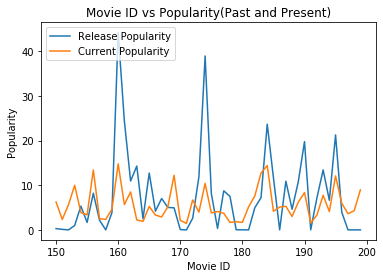

In [184]:
plt.figure()

x = tempscale.index.values[150:200]
y1 = tempscale['rp'][150:200]
y2 = tempscale['popularity'][150:200]

plt.plot(x,y1,label = 'Release Popularity')
plt.plot(x,y2,label = 'Current Popularity')
plt.legend(loc="upper left")
plt.title("Movie ID vs Popularity(Past and Present)")
plt.xlabel("Movie ID")
plt.ylabel("Popularity")
plt.savefig('ab.png',dpi = 200)

In [185]:
end = []
for index, row in tempscale.iterrows():
    calc = row['popularity'] - row['rp']
    end.append(calc)

In [209]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,SVC

newX=tempscale.drop('endurance',axis=1)
newY = tempscale['endurance']
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)

rr = Ridge() # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
#param = {'alpha':[0.1,1,10] }
#ridgereg = GridSearchCV(rr,param,scoring='neg_mean_squared_error',cv=5)
#ridgereg.fit(newX,newY)
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

mse = np.sqrt(np.mean((pred - y_test)**2))

In [255]:
mse

7.299562687931349

In [252]:

from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_trainsvm,y_trainsvm )
SVC(gamma='auto')
predsvm = clf.predict(X_testsvm)

In [229]:
end = []
for index, row in tempscalecopy.iterrows():
    calc = row['popularity'] - row['rp']
    if(calc < 0 ):
        end.append(1)
    else:
        end.append(0)
    

In [247]:
newXsvm=tempscalecopy.drop('endurance',axis=1)
newYsvm = tempscalecopy['endurance']
newYsvm.astype('int')


In [248]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(newYsvm)

In [250]:
X_trainsvm,X_testsvm,y_trainsvm,y_testsvm=train_test_split(newX,encoded,test_size=0.3,random_state=3)


In [253]:
from sklearn.metrics import accuracy_score
accuracy_score(y_testsvm,predsvm)

0.6294552790854069